<a href="https://colab.research.google.com/github/buiminhhien2k/Apple-Store-and-Google-Play-Store/blob/master/Aalto_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from keras import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D , Flatten, AvgPool2D,BatchNormalization
from keras.callbacks import EarlyStopping
import skimage.io
from skimage.transform import resize
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


**This project will try to recognize the weather type through images (Cloudy, Rainy, sunrise, Shining day). The source for the training and validating dataset is in this link https://data.mendeley.com/datasets/4drtyfjtfy/1.

The testing dataset, I collect randomly from google image, 21-22 photos for each class.

In [2]:
filename_list = os.listdir("./drive/My Drive/data_train")

cl_im_list = []
ra_im_list = []
sh_im_list = []
su_im_list = []
for each_name in filename_list:
    path_to_the_image_file ='./drive/My Drive/data_train/'+each_name
    img = skimage.io.imread(path_to_the_image_file,plugin='matplotlib')
    # img = img.astype('float32')/255
    if each_name[:2] == 'cl':
      cl_im_list.append(img)
    elif each_name[:2] == 'ra':
      ra_im_list.append(img)
    elif each_name[:2] == 'sh':
      sh_im_list.append(img)
    elif each_name[:2] == 'su':
      su_im_list.append(img)


cl_label_list = [0]*len(cl_im_list)
ra_label_list = [1]*len(ra_im_list)
sh_label_list = [2]*len(sh_im_list)
su_label_list = [3]*len(su_im_list)

Cloud Image


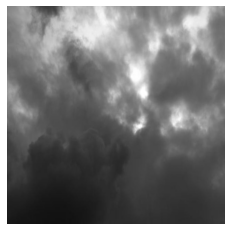

Rain Image


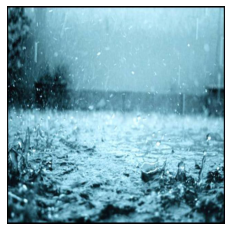

Shining Image


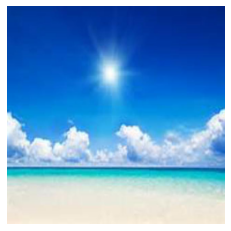

Sunrise Image


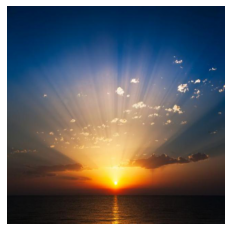

In [3]:
print("Cloud Image")
plt.axis(False)
plt.imshow(cl_im_list[0])
plt.show()
print("Rain Image")
plt.axis(False)
plt.imshow(ra_im_list[0])
plt.show()
print("Shining Image")
plt.axis(False)
plt.imshow(sh_im_list[0])
plt.show()
print("Sunrise Image")
plt.axis(False)
plt.imshow(su_im_list[0])
plt.show()


In [4]:
print("number of cloud images",len(cl_im_list))
print("number of rain images",len(ra_im_list))
print("number of shining images",len(sh_im_list))
print("number of sunrise images",len(su_im_list))

number of cloud images 300
number of rain images 215
number of shining images 253
number of sunrise images 357


In [5]:
cl_x_train, cl_x_test , cl_y_train, cl_y_test = train_test_split(cl_im_list[:215], cl_label_list[:215], test_size= 0.2)
ra_x_train, ra_x_test , ra_y_train, ra_y_test = train_test_split(ra_im_list[:215], ra_label_list[:215], test_size= 0.2)
sh_x_train, sh_x_test , sh_y_train, sh_y_test = train_test_split(sh_im_list[:215], sh_label_list[:215], test_size= 0.2)
su_x_train, su_x_test , su_y_train, su_y_test = train_test_split(su_im_list[:215], su_label_list[:215], test_size= 0.2)

X_train = np.vstack(cl_x_train + ra_x_train + sh_x_train + su_x_train).reshape(-1,640,640,3)
y_train = np.array(cl_y_train + ra_y_train + sh_y_train + su_y_train)

X_valid = np.vstack(cl_x_test + ra_x_test + sh_x_test + su_x_test).reshape(-1,640,640,3)
y_valid = np.array(cl_y_test + ra_y_test + sh_y_test + su_y_test)

My dataset consist 4 categories: Sunrinse, Shining, Rain and Cloudy images. To avoid the imbalanced classes, I will only select first 215 images from each class
* the cloudy image file have name with systax <cloudy*n*.jpg/jpeg>, while *n* is the number of the images
* the rain image file have name with systax <rain*n*.jpg/jpeg>, while *n* is the number of the images
* the shining image file have name with systax <shining*n*.jpg/jpeg>, while *n* is the number of the images
* the sunrise image file have name with systax <sunrise*n*.jpg/jpeg>, while *n* is the number of the images

The above code stack the images from different categories into different lists (`cl_im_list`,`ra_im_list`,`sh_im_list` and `su_im_list`). Besides, cloudy, rain, shining and sunrise images will be assign to labels 0, 1, 2 and 3 respectively

In [6]:
print("Shape of trainning image dataset", X_train.shape)
print("Shape of trainning image dataset", X_valid.shape)
print("min value of images", np.min(X_valid))
print("max value of images", np.max(X_valid))

Shape of trainning image dataset (688, 640, 640, 3)
Shape of trainning image dataset (172, 640, 640, 3)
min value of images 0
max value of images 255


In [7]:
# X_train = X_train / 255
# X_valid = X_valid / 255

`train_test_split` function will split the each categories into trainning dataset (80%) and testing dataset (20%) before stacking all the trainning datasets into `X_train` and all testing datasets into `X_valid`. Do the same process for `y_train` and `y_valid`

There is 688 trainning images and 172 validating images.

In the dataset to train the deep learning model, it will be RGB channel. The values for pixels in each layer will range from 0 - 255



In [8]:
def get_test_data(category,code):

    path = './drive/My Drive/data_' + category +'/'
    img_list = []
    name_list = os.listdir(path)
    for each_name in name_list:
        img_ori = skimage.io.imread(path+each_name,plugin='matplotlib')
        
        img_640_640 = resize(img_ori, (640,640),anti_aliasing=True)
        img_list.append(img_640_640)
    X_test = np.vstack(img_list).reshape(-1,640,640,3)

    y_test = np.array([code] * len(img_list))
    # print(X_test.shape)
    return X_test , y_test

In [9]:
cloud_X_test , cloud_y_test = get_test_data('cloud', 0)
rain_X_test , rain_y_test = get_test_data('rain', 1)
shine_X_test , shine_y_test = get_test_data('shine', 2)
sunrise_X_test , sunrise_y_test = get_test_data('sunrise', 3)


In [10]:
print(cloud_X_test.shape)
print(rain_X_test.shape)
print(shine_X_test.shape)
print(sunrise_X_test.shape)
np.max(rain_X_test)

(21, 640, 640, 3)
(22, 640, 640, 3)
(21, 640, 640, 3)
(21, 640, 640, 3)


1.0

The `*categories*_X_test`will be used for `model.evaluate`. However, the values for pixels in each layer will be range from 0 - 1. Later on, these images will be multiplied by 255 to be synchronous with the trainning and validating dataset used for deep learning model.

Cloud Image in test set


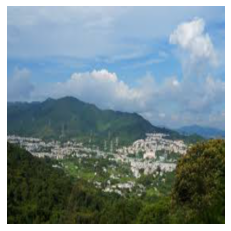

Rain Image in test set


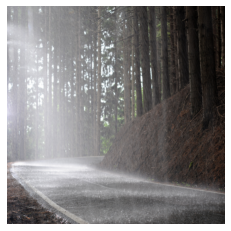

Shining Image in test set


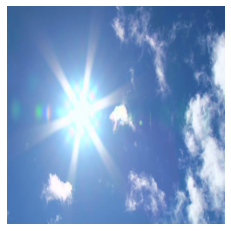

Sunrise Image in test set


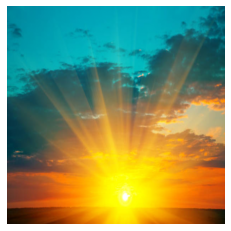

In [11]:
print("Cloud Image in test set")
plt.axis(False)
plt.imshow(cloud_X_test[0])
plt.show()
print("Rain Image in test set")
plt.axis(False)
plt.imshow(rain_X_test[0])
plt.show()
print("Shining Image in test set")
plt.axis(False)
plt.imshow(shine_X_test[0])
plt.show()
print("Sunrise Image in test set")
plt.axis(False)
plt.imshow(sunrise_X_test[0])
plt.show()

In [59]:
  model = Sequential()

  model.add(Conv2D(filters=8, kernel_size= 3,strides = 3, activation='relu',padding='same',input_shape=(640,640,3)))
  model.add(Conv2D(filters=8, kernel_size= 3,strides = 3, activation='relu',padding='same',input_shape=(640,640,3)))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(filters=16, kernel_size= 3,padding='same', activation='relu'))
  model.add(Conv2D(filters=16, kernel_size= 3,padding='same', activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(filters=32,  kernel_size= 3,padding='same', activation='relu'))
  model.add(Conv2D(filters=32,  kernel_size= 3,padding='same', activation='relu'))
  # model.add(Conv2D(filters=32,  kernel_size= 3,padding='same', activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(filters = 64, kernel_size =3,padding='same', activation='relu'))
  model.add(Conv2D(filters = 64, kernel_size =3,padding='same', activation='relu'))
  # model.add(Conv2D(filters = 64, kernel_size =3,padding='same', activation='relu'))
  model.add(MaxPool2D(2))

  # model.add(Conv2D(filters = 128, kernel_size =3,padding='same', activation='relu'))
  # model.add(Conv2D(filters = 128, kernel_size =3,padding='same', activation='relu'))
  # model.add(Conv2D(filters = 128, kernel_size =3,padding='same', activation='relu'))
  # model.add(MaxPool2D(2))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  # model.add(Dense(128, activation='relu'))
  # model.add(BatchNormalization())
  model.add(Dense(4, activation='softmax'))


Above is my Deep-learning model for this project.

* The first layer includes 2 Conv2D of 8 filters, kernel size and strides are equal to 3, and `relu` is activation fucntion; end with 1 Max pool payer of 2 in kernel-size and stride.
* The second layer includes 2 Conv2D of 16 filters, kernel size is equal to 3 and stride is equal to 1, and `relu` is activation fucntion ; end with 1 Max pool payer of 2 in kernel-size and stride.
* The third layer includes 2 Conv2D of 32 filters, kernel size is equal to 3 and stride is equal to 1, and `relu` is activation fucntion ; end with 1 Max pool payer of 2 in kernel-size and stride.
* The final layer is the a Dense layers to categorize the images. Start with Flatten layer, then come with 2 Dense layers of 64 filters with `relu` activation function, finally, categorize the images by `softmax` activation function with 4 categories. It will return 4 values as the confidences for each category, the sum these 4 value will be equal to 1, the deep learning model will get the label with the highest confidence as the output

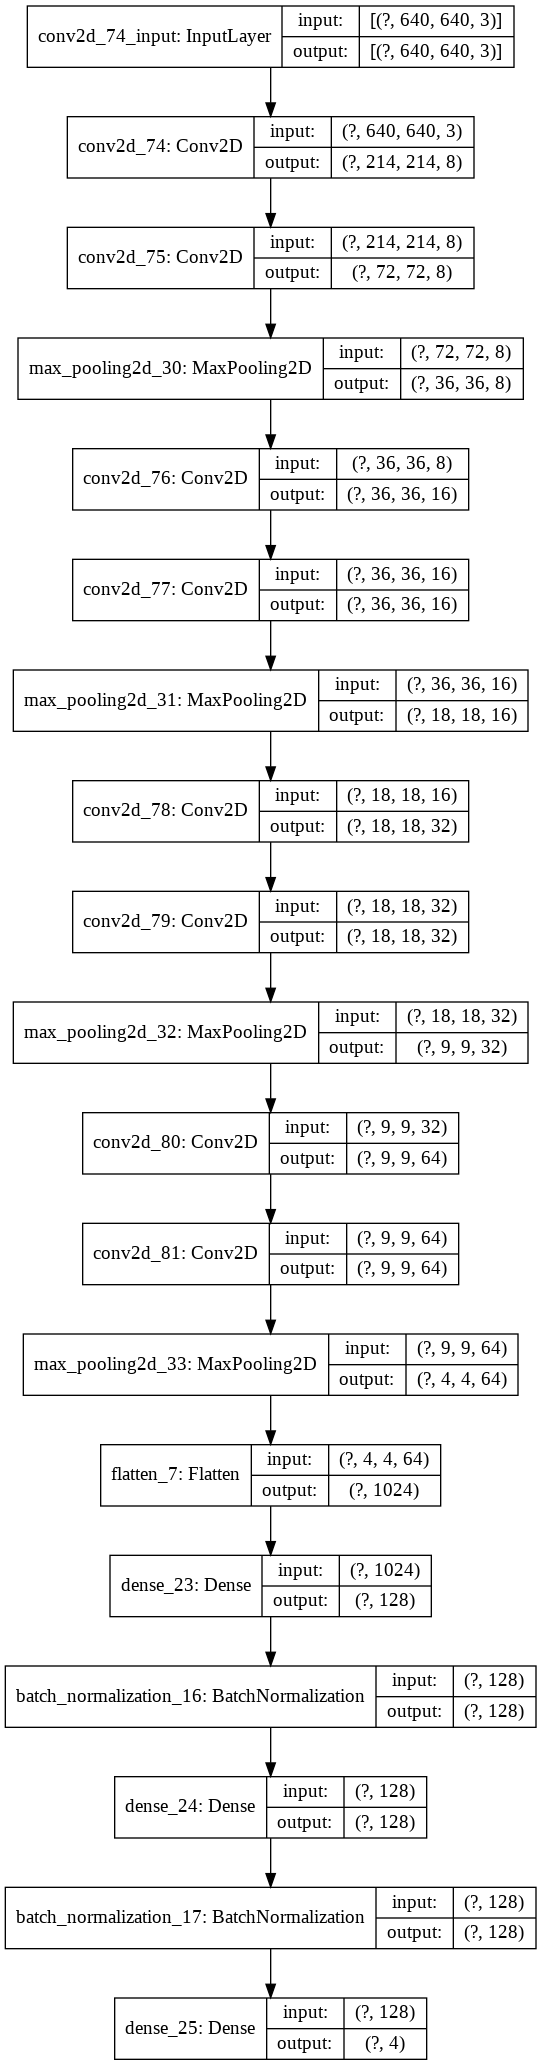

In [60]:
import keras
keras.utils.plot_model(
    model,
    to_file='model.png', show_shapes=True, show_layer_names=True)

In [61]:
# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
es = EarlyStopping(patience=4)
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',metrics=["accuracy"])

The model will be trained with 50 epochs, and 20 images per each epoch. The optimizer for this model would be `RMSprop`. I will **NOT** apply EarlyStopping optimzer in this model.

In [62]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_valid, y_valid)
                    # ,callbacks=[es]
                    )

Epoch 1/100
35/35 [==============================] - 15s 432ms/step - loss: 1.2062 - accuracy: 0.5262 - val_loss: 6.6500 - val_accuracy: 0.2500
Epoch 2/100
35/35 [==============================] - 15s 423ms/step - loss: 0.8587 - accuracy: 0.6468 - val_loss: 5.7478 - val_accuracy: 0.2849
Epoch 3/100
35/35 [==============================] - 15s 420ms/step - loss: 0.8294 - accuracy: 0.6672 - val_loss: 1.3427 - val_accuracy: 0.4244
Epoch 4/100
35/35 [==============================] - 15s 421ms/step - loss: 0.7442 - accuracy: 0.6977 - val_loss: 3.8584 - val_accuracy: 0.3605
Epoch 5/100
35/35 [==============================] - 15s 423ms/step - loss: 0.7492 - accuracy: 0.7195 - val_loss: 1.2311 - val_accuracy: 0.5407
Epoch 6/100
35/35 [==============================] - 15s 423ms/step - loss: 0.6400 - accuracy: 0.7616 - val_loss: 4.6777 - val_accuracy: 0.4012
Epoch 7/100
35/35 [==============================] - 15s 422ms/step - loss: 0.7009 - accuracy: 0.7500 - val_loss: 2.4783 - val_accuracy:

The trainning accuracy is 98.98% and validating accuracy is 91.28%

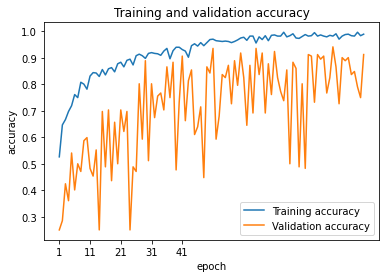

In [63]:

if int(keras.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
val_acc  = history.history['val_'+acc_key]
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
# plt.xlim(0,50)
# plt.axis([0, 51, 0, 1])
plt.xticks(np.arange(1, 51, step=10))
plt.ylabel('accuracy')
plt.legend();

In [64]:
model.evaluate(rain_X_test*255,rain_y_test,batch_size=5)
model.evaluate(cloud_X_test*255,cloud_y_test,batch_size=5)
model.evaluate(sunrise_X_test*255,sunrise_y_test,batch_size=5)
model.evaluate(shine_X_test*255,shine_y_test,batch_size=5)
# np.mean(cloud_X_test[1,:,:,1])

5/5 [==============================] - 0s 29ms/step - loss: 0.0051 - accuracy: 1.0000


[0.005093588028103113, 1.0]

In [65]:
X_test = np.vstack([cloud_X_test ,rain_X_test , shine_X_test,sunrise_X_test])
y_test = np.hstack([cloud_y_test ,rain_y_test , shine_y_test,sunrise_y_test])

In [66]:
print(X_test.shape)
print(y_test.shape)

(85, 640, 640, 3)
(85,)


In [67]:
model.evaluate(X_test*255,y_test,batch_size=5,)

17/17 [==============================] - 1s 48ms/step - loss: 1.3049 - accuracy: 0.8588


[1.3048559427261353, 0.8588235378265381]

Overall, the accuracy in `X_test` dataset is approximately 85.88%, which lower than the validating accuracy 91.28%, which is pretty good

However, there is still something need to be improved. As you can see when I evaluate the images in the same class, there were biases in rainy, shine and sunrise class; the cloudy class was not predicted very well.